<a href="https://colab.research.google.com/github/ealeongomez/Machine-Learning/blob/main/DR_LinearDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#**Load data**

In [ ]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#**Linear Discriminant Analysis**

In [ ]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

- Técnica de transformación lineal
- Método supervisado
- Extrae características que logra aumentar la eficiencia computacional
- Reduce el grado de *Overfitting* ocasionado por la maldición de la dimensionalidad en modelos no regularizados

El objetivo de LDA es encontrar el subespacio de características que óptimiza la divisilidad de la clases 


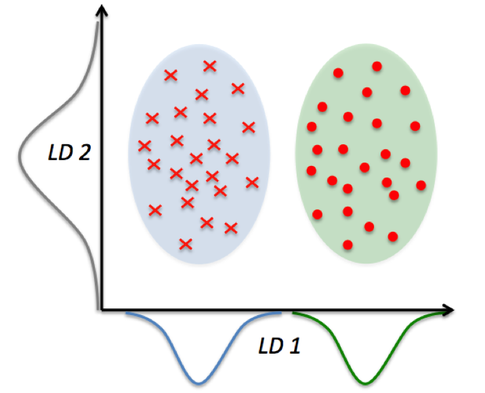

Este método considera algunas suposiones:

- Los datos están normalmente son distribuidos 
- Los datos tienen matrices de covarianza identicas 
- Las características son estadísticamente independientees entre ellas 


Pasos:

1. Estandarizar de las características 
2. Calcular el centroide entre cada una las clases

$$\textbf{m}_i=\frac{1}{n_i} \sum_{x \epsilon D_{i}}^{c} \textbf{x}_m$$

3. Construir una matriz de dispersión entre las clases $\textbf{S}_B$ y una matriz de dispersión dentro de las clases $\textbf{S}_W$

4. Calcular los autovectores y autovalores de la matriz $\textbf{S}_W^{-1}\textbf{S}_B$
5. Clasificar los autovectores de acuerdo al orden decreciente de los autovalores 
6. Seleccioanr los $k$ autovectores que corresponde a los $k$ autovalores más altos para construir una matriz de tranasformación $\textbf{W}$ de $dxk$ ($d$ son las características y $k$ las dimensiones); los autovectores son las columnas de esa matriz 
7. Proyectar las  muestras en el nuevo subespacio de caracteríticas mediante la matriz de transformación $\textbf{W}$



In [ ]:
# Estandarización de las características 
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [ ]:
# Forma en que se muestran los números de punto flotante
np.set_printoptions(precision=4)            

# Valor medio entre cada una de las clases 
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

  print("MV %s: %s\n" %(label, mean_vecs[label-1]) )


MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



$$\textbf{S}_W = \sum_{i=1}^{c} \textbf{S}_i$$

$$\textbf{S}_i = \sum_{x \epsilon D_{i}}^{c} \left( \textbf{x} - \textbf{m}_i \right)\left( \textbf{x} - \textbf{m}_i \right)^{\top}$$


In [ ]:
# Construcción de la matriz de dispersión
d = df_wine.shape[1]-1
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train==label]:
    row, mv = row.reshape(d,1), mv.reshape(d,1)
    class_scatter += (row-mv).dot((row-mv).T)
  S_W += class_scatter

print("Whitinn-class scatter matrix: %sx%s" %(S_W.shape[0], S_W.shape[1]))


Whitinn-class scatter matrix: 13x13


In [ ]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


Debido a que las etiquetas de los datos no se encuentrán uniformemente distribuidas, debemos escalar las matrices de dispersión $\textbf{S}_W$, esto se puede lograr dividiendo las matrices de dispersión por la cantidad de etiquetas

$$ \Sigma_i = \frac{1}{n_i} \textbf{S}_i = \frac{1}{n_i} \sum_{x \epsilon D_{i}}^{c} \left( \textbf{x} - \textbf{m}_i \right)\left( \textbf{x} - \textbf{m}_i \right)^{\top}$$



In [ ]:
d = df_wine.shape[1]-1
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T)
  S_W += class_scatter

print("Scaled Whitin-class scatter matrix: %sx%s" %(S_W.shape[0], S_W.shape[1]))


Scaled Whitin-class scatter matrix: 13x13


$$\textbf{S}_B = \sum_{i=1}^{c} \eta_i \left( \textbf{m}_i - \textbf{m} \right)\left( \textbf{m}_i - \textbf{m} \right)^{\top}$$

Donde $\textbf{m}$ es el promedio general calculado


In [ ]:
mean_overall = np.mean(X_train_std, axis=0)
S_B = np.zeros((d,d))

for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train==i+1,:].shape[0]
  mean_vec = mean_vec.reshape(d,1)
  mean_overall = mean_overall.reshape(d,1)
  S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

print("Between-class scatter matrix: %sx%s" %(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


$\textbf{S}_W^{-1}\textbf{S}_B$

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
# Hacer una lista de las tuplas (autovalores y autovectores)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order: \n')

for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in descending order: 

452.72158124497435
156.436361219523
4.216578679796863e-14
4.216578679796863e-14
3.8663437063049666e-14
2.1702732800026337e-14
2.1702732800026337e-14
1.724603693662558e-14
1.5484659297728344e-14
9.504269525886304e-15
1.823802610668736e-15
1.823802610668736e-15
0.0


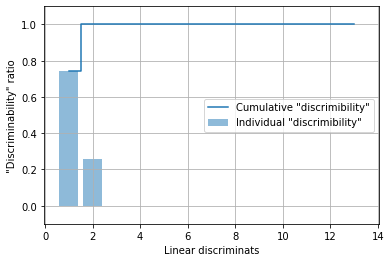

In [ ]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1,14), discr, alpha=0.5, align='center', label='Individual "discrimibility"')
plt.step(range(1,14), cum_discr, where='mid', label='Cumulative "discrimibility"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminats')
plt.ylim([-0.1, 1.1])
plt.legend()
plt.grid()
plt.show()


In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))

print("Matrix W: \n", w)

Matrix W: 
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


Proyectar muestras a un nuevo espacio de características

$$\textbf{X}^{'}=\textbf{X}\textbf{W}$$

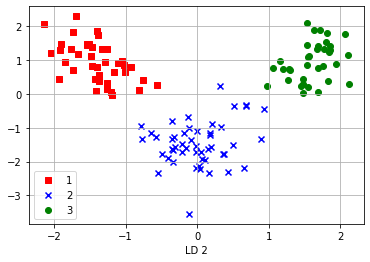

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1]*(-1), c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.xlabel('LD 2')
plt.legend()
plt.grid()
plt.show()


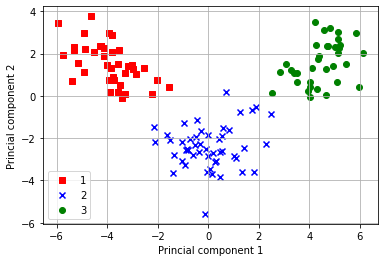

In [ ]:
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend()
plt.grid()
plt.show()
